In [1]:
from pyMez import *
from Code.Analysis.Transformations import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 1.246 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.215 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 4.166 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.005 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.131 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.01 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 0.714 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.007 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.006 s to import Code.Utils.Names
It took 6.5 s to import all of the active modules


In [2]:
zva=VNA("GPIB::20")

In [3]:
frequency_start=50*10**9
frequency_stop=75*10**9
number_points=251
#data_directory=r"C:\Share\WR15_20180213"
base_data_directory=r"C:\Share\WR15_OML_20180309"

In [4]:
#test_frequency_list=np.linspace(frequency_start,frequency_stop,number_points)
# Note with the frequency converter you can't initialize the sweeps. Set up the zva traces manually
# to have "S11","S21","S12","S22","A1_D1","B1_D1","A2_D1","B2_D1"

Begining Measurements at 2018-03-13 14:53:36.965000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s2p\True_Thru_WR15_20180313_001.s2p
 It took 50 seconds


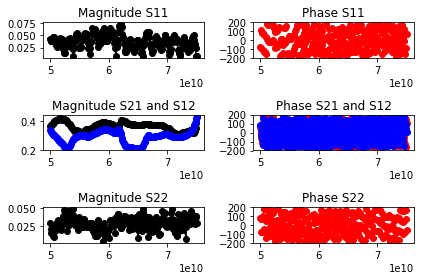

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s1p\port1\True_Thru_WR15_Port1_20180313_001.s1p


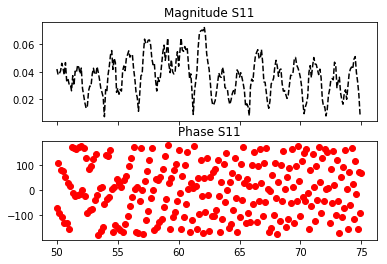

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\s1p\port2\True_Thru_WR15_Port2_20180313_001.s1p


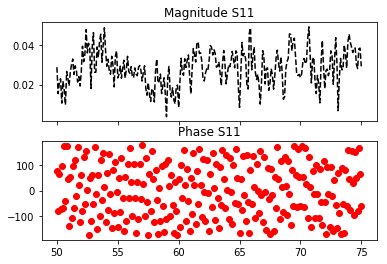

 It took 53 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w2p\True_Thru_WR15_Wave_Parameters_20180313_001.w2p
 It took 103 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180313_001.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru _WO_AlignmentPins\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180313_001.w1p
 It took 204 seconds
 Measurements finished at 2018-03-13 14:57:01.573000
 Total time of measurements was 0:03:24.608000 


In [4]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru _WO_AlignmentPins"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))
switch_terms_directory=os.path.join(data_directory,subdirectory,"SwitchTerms")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="GWR15_Wave_Parameters",extension="s2p")
switch_terms=W2p_to_SwitchTerms(w2p)
switch_terms.path=os.path.join(switch_terms_directory,name)
switch_terms.save()

TypeError: complex() can't take second arg if first is a string

Begining Measurements at 2018-03-09 22:37:02.409000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru\s2p\True_Thru_WR15_20180309_001.s2p
 It took 50 seconds


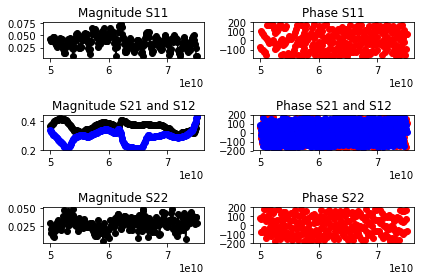

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port1\True_Thru_WR15_Port1_20180309_001.s1p


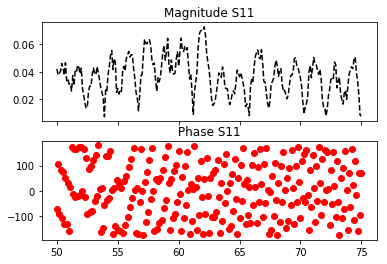

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port2\True_Thru_WR15_Port2_20180309_001.s1p


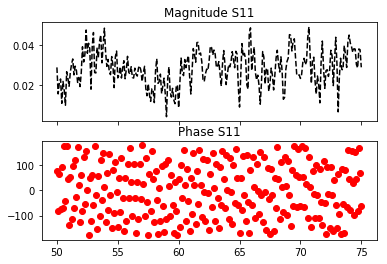

 It took 54 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru\w2p\True_Thru_WR15_Wave_Parameters_20180309_001.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180309_001.w1p
 It took 154 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180309_001.w1p
 It took 205 seconds
 Measurements finished at 2018-03-09 22:40:27.678000
 Total time of measurements was 0:03:25.269000 


In [9]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-09 22:40:47.418000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru\s2p\True_Thru_WR15_20180309_002.s2p
 It took 50 seconds


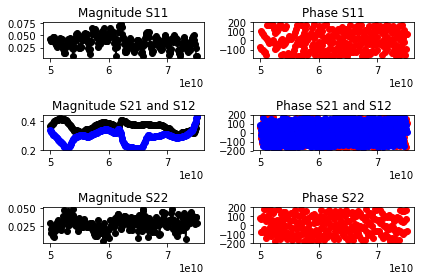

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port1\True_Thru_WR15_Port1_20180309_002.s1p


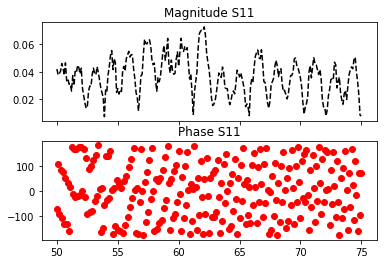

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port2\True_Thru_WR15_Port2_20180309_002.s1p


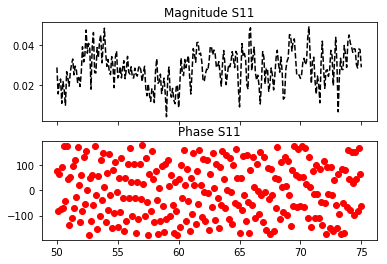

 It took 54 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru\w2p\True_Thru_WR15_Wave_Parameters_20180309_002.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180309_002.w1p
 It took 155 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180309_002.w1p
 It took 205 seconds
 Measurements finished at 2018-03-09 22:44:12.930000
 Total time of measurements was 0:03:25.512000 


In [10]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))

Begining Measurements at 2018-03-09 22:44:51.871000
IFBW is 10.0
Measuring s2p ...
Measured s2p, saved at C:\Share\WR15_OML_20180309\Thru\s2p\True_Thru_WR15_20180309_003.s2p
 It took 50 seconds


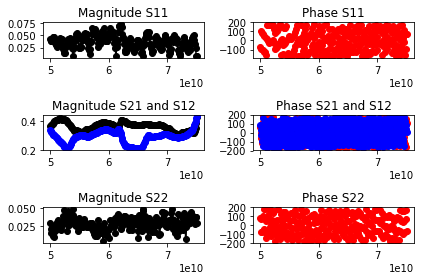

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port1\True_Thru_WR15_Port1_20180309_003.s1p


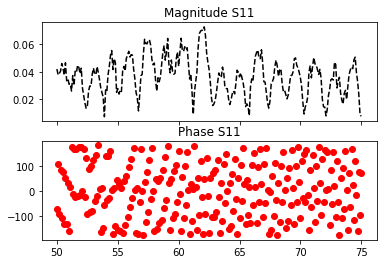

Split s1p port from s2p, saved at C:\Share\WR15_OML_20180309\Thru\s1p\port2\True_Thru_WR15_Port2_20180309_003.s1p


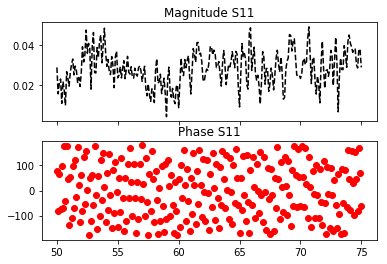

 It took 54 seconds
Measured w2p, saved at C:\Share\WR15_OML_20180309\Thru\w2p\True_Thru_WR15_Wave_Parameters_20180309_003.w2p
 It took 104 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port1\True_Thru_WR15_Wave_Parameters_Port1_20180309_003.w1p
 It took 155 seconds
Measured w1p, saved at C:\Share\WR15_OML_20180309\Thru\w1p\port2\True_Thru_WR15_Wave_Parameters_Port2_20180309_003.w1p
 It took 205 seconds
 Measurements finished at 2018-03-09 22:48:17.381000
 Total time of measurements was 0:03:25.510000 


In [11]:
data_directory=r"C:\Share\WR15_OML_20180309"
subdirectory="Thru"
specific_description="True_Thru"
zva.set_IFBW(10)
zva.set_frequency(frequency_start,frequency_stop,number_points)
start=datetime.datetime.utcnow()
print("Begining Measurements at {0}".format(start))
print("IFBW is {0}".format(zva.get_IFBW()))


# Measure s2p and store along with s1ps
print("Measuring s2p ...")
s2p=zva.measure_sparameters()
s2p_directory=os.path.join(data_directory,subdirectory,"s2p")
name=auto_name(directory=s2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15",extension="s2p")
s2p.path=os.path.join(s2p_directory,name)
s2p.save()

print("Measured s2p, saved at {0}".format(s2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
s2p.show();

port_1_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port1")
name=auto_name(directory=port_1_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port1",extension="s1p")
port1_s1p=S2p_to_S1p(s2p,column="S11")
port1_s1p.path=os.path.join(port_1_s1p_directory,name)
port1_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port1_s1p.path))
port1_s1p.show();

port_2_s1p_directory=os.path.join(data_directory,subdirectory,"s1p","port2")
name=auto_name(directory=port_2_s1p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Port2",extension="s1p")
port2_s1p=S2p_to_S1p(s2p,column="S22")
port2_s1p.path=os.path.join(port_2_s1p_directory,name)
port2_s1p.save()
print("Split s1p port from s2p, saved at {0}".format(port2_s1p.path))
port2_s1p.show();
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
# Measure w2p and w1ps as seperate trigger events 
w2p=zva.measure_w2p()
w2p_directory=os.path.join(data_directory,subdirectory,"w2p")
name=auto_name(directory=w2p_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters",extension="w2p")
w2p.path=os.path.join(w2p_directory,name)
w2p.save()
w2p.options["IFBW"]=zva.get_IFBW()
w2p.options["Power"]=zva.get_power()
w2p.options["Extender"]="OML_V15VNA2R"
w2p.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w2p.save_schema(change_extension(os.path.join(w2p_directory,name),new_extension="schema"))
print("Measured w2p, saved at {0}".format(w2p.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port1=zva.measure_w1p(port=1)
w1p_port1_directory=os.path.join(data_directory,subdirectory,"w1p","port1")
name=auto_name(directory=w1p_port1_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port1",extension="w1p")
w1p_port1.path=os.path.join(w1p_port1_directory,name)
w1p_port1.save()
w1p_port1.options["IFBW"]=zva.get_IFBW()
w1p_port1.options["Power"]=zva.get_power()
w1p_port1.options["Extender"]="OML_V15VNA2R"
w1p_port1.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port1.save_schema(change_extension(os.path.join(w1p_port1_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port1.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))

w1p_port2=zva.measure_w1p(port=2)
w1p_port2_directory=os.path.join(data_directory,subdirectory,"w1p","port2")
name=auto_name(directory=w1p_port2_directory,specific_descriptor=specific_description,
               general_descriptor="WR15_Wave_Parameters_Port2",extension="w1p")
w1p_port2.path=os.path.join(w1p_port2_directory,name)
w1p_port2.save()
w1p_port2.options["IFBW"]=zva.get_IFBW()
w1p_port2.options["Power"]=zva.get_power()
w1p_port2.options["Extender"]="OML_V15VNA2R"
w1p_port2.options["Measurement_Timestamp"]=datetime.datetime.utcnow()
w1p_port2.save_schema(change_extension(os.path.join(w1p_port2_directory,name),new_extension="schema"))
print("Measured w1p, saved at {0}".format(w1p_port2.path))
current_time=datetime.datetime.utcnow()-start
print(" It took {0} seconds".format(current_time.seconds))
stop=datetime.datetime.utcnow()
diff=stop-start
print(" Measurements finished at {0}".format(stop))
print(" Total time of measurements was {0} ".format(diff))